# Librerias de apoyo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from glob import glob
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from sklearn.utils import shuffle

import imutils

# Datos de píxeles SVM

In [ ]:
from sklearn.utils import shuffle
#df = shuffle(df)
#df = df.reset_index(drop=True)
#df

In [ ]:
df_test=pd.read_csv('datos/df_test_sinrotar_3cat.csv',header=None)
#df_test=df_test.loc[:, :6]
df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train=pd.read_csv('datos/df_train_sinrotar_3cat.csv',header=None)
#df_train=df_train.loc[:, 7:]
df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train=shuffle(df_train)
df_train= df_train.reset_index(drop=True)
df_train

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2335,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2337,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#frames_e = [df_train, df_test]
#df_chiles_train = pd.concat(frames_e)
#df_chiles_train.to_csv('df_chiles_pixeles.csv', header=False, index=False)

In [ ]:
#df_train=pd.read_csv('df_chiles_pixeles.csv',header=None)
#df_train

## Se preparan los datos

In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

## Se define el Pipeline y el Clasificador

In [ ]:
#Definir el pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

steps=[
    ('scaler',StandardScaler()),
    ('SVM',SVC(kernel='poly'))
]
pipeline=Pipeline(steps)

## Se realiza el Tuning

In [ ]:
#Parámetros
# C = [0.0001,0.001]
# gamma = [20,10]
parametros={'SVM__C': [0.000001, 0.00001, 0.0001,0.001], 'SVM__gamma':[30, 20,10]}

In [ ]:
#Realizar el tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipeline, param_grid=parametros, cv=10, n_jobs=-1, verbose=5)

In [ ]:
#Ajuste
grid.fit(X_train,y_train)
#5m 2.6s

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 4/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.799 total time=  10.0s
[CV 2/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.803 total time=  10.5s
[CV 3/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.846 total time=  11.1s
[CV 1/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.808 total time=  11.4s
[CV 5/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.825 total time=   9.6s
[CV 6/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.782 total time=  10.6s
[CV 7/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.782 total time=  10.3s
[CV 8/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.786 total time=  10.8s
[CV 9/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.791 total time=  11.2s
[CV 2/10] END ......SVM__C=1e-06, SVM__gamma=20;, score=0.803 total time=   8.9s
[CV 10/10] END .....SVM__C=1e-06, SVM__gamma=30;, score=0.790 total time=   9.9s
[CV 1/10] END ......SVM__C=1e-06, SVM__gamma=2

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid={'SVM__C': [1e-06, 1e-05, 0.0001, 0.001],
                         'SVM__gamma': [30, 20, 10]},
             verbose=5)

In [ ]:
#mostrar los mejores valores del tuning
grid.best_params_

{'SVM__C': 1e-06, 'SVM__gamma': 30}

## Se prueba el clasificador SVM

In [ ]:
# Encontrar el score
grid.score(X_test,y_test)
#0.8449612403100775

0.7403100775193798

In [ ]:
# Realizar la predicción en los datos de test
y_pred=grid.predict(X_test)

In [ ]:
#mostrar la predicción para los primeros 10 valores de prueba
y_pred[0:10]

array([2., 3., 1., 1., 1., 2., 2., 3., 2., 1.])

In [ ]:
#mostrar los valores reales de los primeros 10 valores de prueba
y_test[0:10]

0    2.0
1    3.0
2    1.0
3    2.0
4    2.0
5    2.0
6    1.0
7    3.0
8    2.0
9    1.0
Name: 0, dtype: float64

In [ ]:
# Creación del dataframe de resultados
resultados=pd.DataFrame()
resultados['y_test']=y_test
resultados['y_pred_imagen']=y_pred
resultados

,y_test,y_pred_imagen
0,2.0,2.0
1,3.0,3.0
2,1.0,1.0
3,2.0,1.0
4,2.0,1.0
...,...,...
253,3.0,3.0
254,3.0,2.0
255,3.0,2.0
256,2.0,3.0


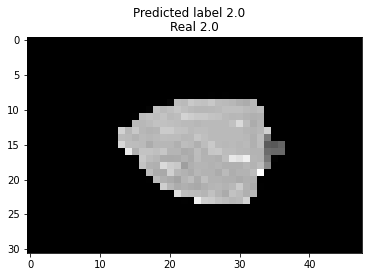

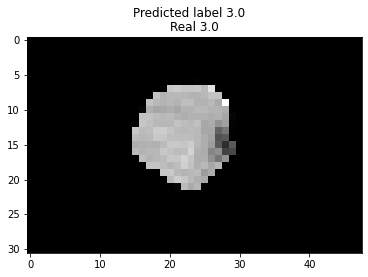

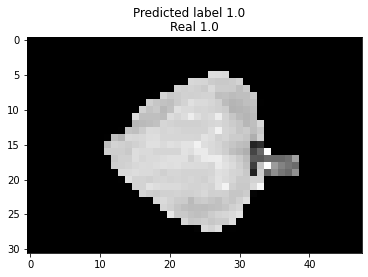

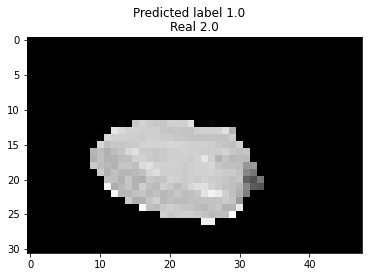

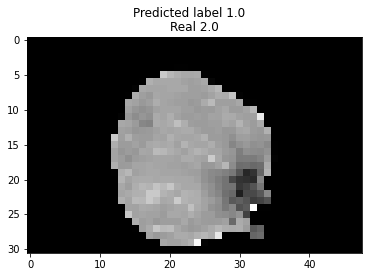

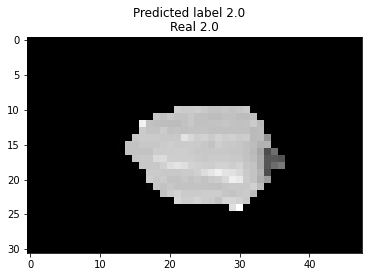

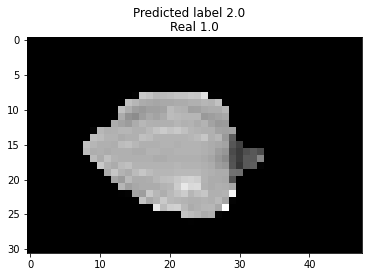

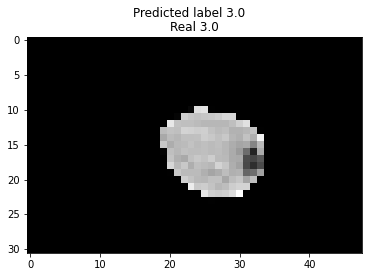

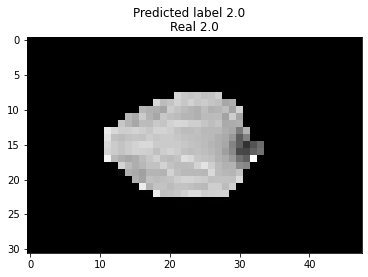

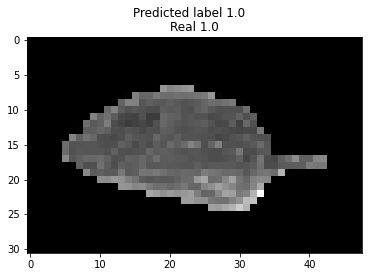

In [ ]:
#Mostrar la prediccion y la clase de chile
for i in range(0,10):
    img=X_test.loc[:,7:].values[i].reshape((31,48))
    plt.suptitle('Predicted label {0}'.format(y_pred[i]))
    plt.title('Real {0}'.format(y_test[i]))
    plt.imshow(img,cmap='gray')
    plt.show()

Text(0.5, 1.0, 'SVM con Píxeles')

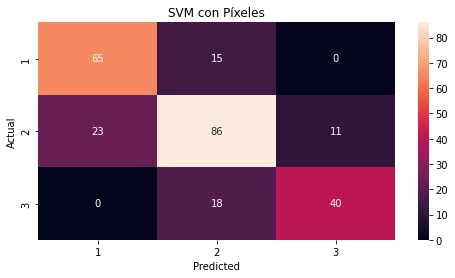

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1, 4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("SVM con Píxeles")

# Datos de la elipse SVM

In [ ]:
df_test=pd.read_csv('datos/df_test_sinrotar_3cat.csv',header=None)
df_test=df_test.loc[:, :6]
#df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,1,2,3,4,5,6
0,2.0,427.528900,358.529419,340.851624,269.177734,72060.020568,1923.083418
1,2.0,417.683777,380.530945,442.968933,249.291382,86730.213416,2217.567966
2,2.0,461.936920,313.294983,435.122345,339.523285,116030.144142,2442.895894
3,1.0,475.942963,372.699829,548.987183,380.517212,164068.947568,2944.155511
4,1.0,432.231781,393.228790,447.328430,314.831726,110610.122327,2412.521682
...,...,...,...,...,...,...,...
253,2.0,482.374268,358.167236,356.092651,277.748657,77679.220830,1998.883852
254,2.0,413.818756,313.076752,431.099304,289.474854,98011.727997,2285.665407
255,2.0,502.814362,319.639008,347.449036,286.589172,78206.125450,1996.480559
256,3.0,505.623047,343.664154,329.930908,293.606323,76081.363701,1960.562330


In [ ]:
df_train=pd.read_csv('datos/df_train_sinrotar_3cat.csv',header=None)
df_train=df_train.loc[:, :6]
#df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train=shuffle(df_train)
df_train= df_train.reset_index(drop=True)
df_train

,0,1,2,3,4,5,6
0,2.0,503.784851,298.891296,394.629761,317.313019,98348.469624,2243.233726
1,1.0,375.729279,358.205383,510.027802,305.577698,122406.755289,2602.711296
2,2.0,449.303925,316.225159,446.157166,416.336121,145888.764015,2710.412436
3,3.0,475.686310,272.855255,344.221161,314.651855,85066.339176,2070.953005
4,3.0,458.962677,312.816101,320.128815,302.287506,76003.719353,1955.780225
...,...,...,...,...,...,...,...
2334,3.0,450.764099,298.086182,268.279877,262.380096,55285.197678,1667.168990
2335,1.0,417.490875,354.855865,484.596344,346.150146,131745.119096,2628.019689
2336,2.0,401.035461,196.160782,424.161774,367.004944,122262.514211,2488.767690
2337,1.0,462.844635,328.808624,542.589905,395.009827,168333.087928,2963.829095


In [ ]:
#frames_e = [df_train, df_test]
#df_chiles_train = pd.concat(frames_e)
#df_chiles_train.to_csv('df_chiles_datos.csv', header=False, index=False)

In [ ]:
#df_test=pd.read_csv('df_chiles_datos.csv',header=None)
#df_test.columns=['Clasificación', 'Centro_X', 'Centro_Y', 'Largo', 'Ancho', 'Área', 'Perímetro']
#df_test

## Se preparan los datos

In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

## Se define el Pipeline y el Clasificador

In [ ]:
#Definir el pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

steps=[
    ('scaler',StandardScaler()),
    ('SVM',SVC(kernel='poly'))
]
pipeline=Pipeline(steps)

## Se realiza el Tuning

In [ ]:
#Parámetros
# C = [0.0001,0.001]
# gamma = [20,10]
parametros={'SVM__C': [0.00001, 0.0001,0.001], 'SVM__gamma':[ 30, 20,10, 5]}

In [ ]:
#Realizar el tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipeline, param_grid=parametros, cv=10, n_jobs=-1, verbose=5)

In [ ]:
#Ajuste
grid.fit(X_train,y_train)
#3m 0.6s

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 3/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.821 total time=   0.6s
[CV 1/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.778 total time=   0.7s
[CV 4/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.816 total time=   0.7s
[CV 2/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.808 total time=   0.7s
[CV 5/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.821 total time=   0.6s
[CV 6/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.842 total time=   0.7s
[CV 8/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.808 total time=   0.7s
[CV 7/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.799 total time=   0.9s
[CV 1/10] END ......SVM__C=1e-05, SVM__gamma=20;, score=0.769 total time=   0.4s
[CV 9/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.842 total time=   0.7s
[CV 2/10] END ......SVM__C=1e-05, SVM__gamma=20;, score=0.803 total time=   0.3s
[CV 10/10] END .....SVM__C=1e-05, SVM__gamma=3

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid={'SVM__C': [1e-05, 0.0001, 0.001],
                         'SVM__gamma': [30, 20, 10, 5]},
             verbose=5)

In [ ]:
#mostrar los mejores valores del tuning
grid.best_params_

{'SVM__C': 0.001, 'SVM__gamma': 30}

## Se prueba el clasificador SVM

In [ ]:
# Encontrar el score
grid.score(X_test,y_test)

0.7829457364341085

In [ ]:
# Realizar la predicción en los datos de test
y_pred=grid.predict(X_test)

In [ ]:
#mostrar la predicción para los primeros 10 valores de prueba
y_pred[0:10]

array([2., 1., 2., 1., 1., 1., 1., 1., 2., 1.])

In [ ]:
#mostrar los valores reales de los primeros 10 valores de prueba
y_test[0:10]

0    2.0
1    2.0
2    2.0
3    1.0
4    1.0
5    1.0
6    2.0
7    1.0
8    2.0
9    1.0
Name: 0, dtype: float64

Text(0.5, 1.0, 'SVM Elipse')

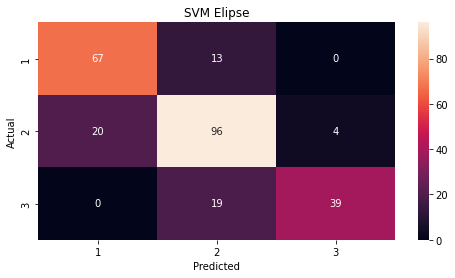

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1,4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("SVM Elipse")

# Píxeles Random Forest

In [ ]:
df_test=pd.read_csv('datos/df_test_sinrotar_3cat.csv',header=None)
#df_test=df_test.loc[:, :6]
df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train=pd.read_csv('datos/df_train_sinrotar_3cat.csv',header=None)
#df_train=df_train.loc[:, 7:]
df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train=shuffle(df_train)
df_train= df_train.reset_index(drop=True)
df_train

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

In [ ]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Modelo
model= RandomForestClassifier(random_state=17, max_depth=5, n_estimators=10)

In [ ]:
# Ajuste del modelado
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=17)

In [ ]:
# Predicción
y_pred= model.predict(X_test)

In [ ]:
# Comparación
np.equal(y_pred, y_test.values)

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,

In [ ]:
# Score
model.score(X_test, y_test)

0.6976744186046512

In [ ]:
#RandomForestClassifier(random_state=17,max_depth=i,n_estimators=j)
for j in range(10, 50, 10):
    for i in range(1, 10, 2):
        for k in range(1, 10, 2):
            for l in range(2, 10, 2):
                print(f'Modelo con max_depth {i}, n_estimators = {j}, min_samples_leaf = {k}, min_samples_split = {l}')
                model= RandomForestClassifier(random_state=17, max_depth=i, n_estimators=j, min_samples_leaf=k, min_samples_split=l)
                model.fit(X_train, y_train)
                print( f'Precisión:  {model.score(X_test, y_test)}')
                print('.....')

#1m 5.2s

Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 2
Precisión:  0.5387596899224806
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 4
Precisión:  0.5387596899224806
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 6
Precisión:  0.5387596899224806
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 8
Precisión:  0.5387596899224806
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 2
Precisión:  0.5387596899224806
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 4
Precisión:  0.5387596899224806
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 6
Precisión:  0.5387596899224806
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 8
Precisión:  0.5387596899224806
.....
Modelo c

In [ ]:
model= RandomForestClassifier(0.0.max_depth=7, n_estimators=40, min_samples_leaf=1, min_samples_split=4)
# min_samples_split=8
model.fit(X_train, y_train)
print( f'Precisión:  {model.score(X_test, y_test)}')
#0.4s
#0.7946

Precisión:  0.7945736434108527


In [ ]:
y_pred= model.predict(X_test)

Text(0.5, 1.0, 'Random Forest con Píxeles')

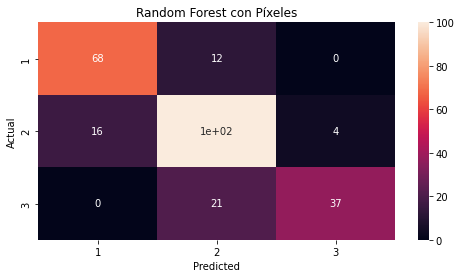

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1,4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("Random Forest con Píxeles")

# Elipse Random Forest

In [ ]:
df_test=pd.read_csv('datos/df_test_sinrotar_3cat.csv',header=None)
df_test=df_test.loc[:, :6]
#df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,1,2,3,4,5,6
0,2.0,402.103943,379.643127,406.000305,257.616394,82146.627500,2110.953594
1,2.0,475.833862,338.327332,353.993774,290.239960,80694.272536,2028.878175
2,3.0,448.255951,290.618744,313.927521,291.765533,71937.155058,1903.477778
3,2.0,411.614471,300.196716,394.885742,316.858521,98271.305314,2242.733882
4,2.0,409.624969,328.166199,414.699005,338.308746,110188.456769,2371.734023
...,...,...,...,...,...,...,...
253,3.0,481.009735,345.247711,331.121521,266.036621,69186.078128,1881.603132
254,2.0,453.859894,347.454346,510.317505,461.098602,184809.440769,3053.752632
255,2.0,461.389221,332.988403,427.254761,290.382507,97442.236383,2275.073717
256,3.0,510.915710,342.297546,342.274475,257.177795,69134.983511,1892.734519


In [ ]:
df_train=pd.read_csv('datos/df_train_sinrotar_3cat.csv',header=None)
df_train=df_train.loc[:, :6]
#df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train=shuffle(df_train)
df_train= df_train.reset_index(drop=True)
df_train

,0,1,2,3,4,5,6
0,2.0,425.117767,340.181488,442.197998,346.334167,120282.374317,2486.408678
1,2.0,484.598145,310.351593,513.880615,314.366455,126878.581499,2639.899371
2,3.0,474.291565,304.920990,235.607590,223.070999,41278.344411,1441.250414
3,2.0,429.565826,268.052155,385.386353,348.311279,105427.461809,2306.450746
4,2.0,403.404877,293.565460,431.668579,277.569855,94104.982280,2254.512666
...,...,...,...,...,...,...,...
2334,2.0,489.296722,345.223846,406.573242,306.805176,97969.604819,2252.116374
2335,1.0,382.621552,295.991333,487.431244,414.548370,158700.559259,2838.279764
2336,3.0,456.807007,322.515900,395.982635,290.414978,90320.229891,2169.152537
2337,3.0,438.691895,239.579880,278.801788,236.904251,51875.021588,1622.812813


In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

In [ ]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Modelo
model= RandomForestClassifier(random_state=17, max_depth=5, n_estimators=10)

In [ ]:
# Ajuste del modelado
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=17)

In [ ]:
# Predicción
y_pred= model.predict(X_test)

In [ ]:
# Comparación
np.equal(y_pred, y_test.values)

array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# Score
model.score(X_test, y_test)

0.7713178294573644

In [ ]:
#RandomForestClassifier(random_state=17,max_depth=i,n_estimators=j)
for j in range(10, 50, 10):
    for i in range(1, 10, 2):
        for k in range(1, 10, 2):
            for l in range(2, 10, 2):
                print(f'Modelo con max_depth {i}, n_estimators = {j}, min_samples_leaf = {k}, min_samples_split = {l}')
                model= RandomForestClassifier(random_state=17, max_depth=i, n_estimators=j, min_samples_leaf=k, min_samples_split=l)
                model.fit(X_train, y_train)
                print( f'Precisión:  {model.score(X_test, y_test)}')
                print('.....')
# 31.7s

Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 2
Precisión:  0.7015503875968992
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 4
Precisión:  0.7015503875968992
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 6
Precisión:  0.7015503875968992
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 8
Precisión:  0.7015503875968992
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 2
Precisión:  0.7015503875968992
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 4
Precisión:  0.7015503875968992
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 6
Precisión:  0.7015503875968992
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 8
Precisión:  0.7015503875968992
.....
Modelo c

In [ ]:
# Modelo
model= RandomForestClassifier(random_state=17, max_depth=9, n_estimators=20, min_samples_leaf=1, min_samples_split=6)
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred= model.predict(X_test)
print( f'Precisión:  {model.score(X_test, y_test)}')
#0.1 s
#0.8101

Precisión:  0.810077519379845


Text(0.5, 1.0, 'Random Forest Elipse')

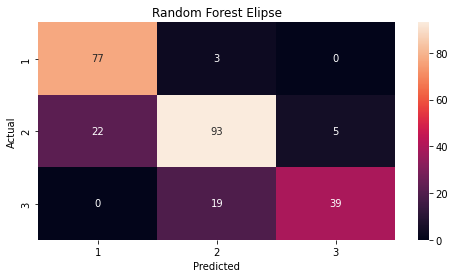

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1,4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("Random Forest Elipse")

In [ ]:
resultados=pd.DataFrame()
resultados['y_test']=y_test
resultados['y_pred_elipse']=y_pred.tolist()
resultados

,y_test,y_pred_elipse
0,2.0,2.0
1,2.0,2.0
2,3.0,3.0
3,2.0,2.0
4,2.0,2.0
...,...,...
253,3.0,3.0
254,2.0,1.0
255,2.0,2.0
256,3.0,2.0


In [ ]:
resultados[(resultados['y_test']==1) & (resultados['y_pred_elipse']==1)]

,y_test,y_pred_elipse
8,1.0,1.0
14,1.0,1.0
17,1.0,1.0
20,1.0,1.0
24,1.0,1.0
...,...,...
233,1.0,1.0
239,1.0,1.0
241,1.0,1.0
245,1.0,1.0


In [ ]:
resultados[(resultados['y_test']==0) & (resultados['y_pred_elipse']==1)].count()

y_test           0
y_pred_elipse    0
dtype: int64